<a href="https://colab.research.google.com/github/austinkirwin/public-projects/blob/main/Python_projects/Insurance_model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Cost Analysis Project

## Background Information

Insurance companies are always interested in how they can maximize their profit based on the risk level of their customers. In this analysis I will be creating a predictive neural network based on the data provided from this [Kaggle Page]("https://www.kaggle.com/datasets/mirichoi0218/insurance") in order to accurately predict how much a customer should be charged based on the given explanatory variables. Furthermore, I will be creating a linear/logistic regression model to determine which variable is most significantly affecting the charges of the customer.

### Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Reading the dataset into pandas

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Note:** The data contains string values which the model will not be able to process; therefore, the data values will be one-hot encoded.

In [ ]:
# One-hot encoding the data
insurance_one_hot_encoded = pd.get_dummies(insurance, dtype = int)

### Creating the training and test datasets

In [ ]:
# Separating explanatory variables (expvar) and response (charges)
expvar = insurance_one_hot_encoded.drop("charges", axis = 1)
charges = insurance_one_hot_encoded["charges"]
expvar_train, expvar_test, charges_train, charges_test = train_test_split(expvar, charges, test_size = .2, random_state = 10) # random_state is set for reproducibility
len(expvar_test) / len(expvar) # Make sure the split worked

0.20029895366218237

### Creating a basic neural network model

This first model will have 1 layer, use SGD as its optimizer, and run for 100 epochs.

In [ ]:
# Set random seed (for reproducibility)
tf.random.set_seed(10)

# 1. Create the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_1.fit(expvar_train, charges_train, epochs = 100, verbose = 0) # verbose = 0 to reduce clutter, since I will be evaluating the model anyway

In [ ]:
# Evaluating the model
insurance_model_1.evaluate(expvar_test, charges_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6818.1729 - mae: 6818.1729 


[7178.7421875, 7178.7421875]

Text(0.5, 0, 'epochs')

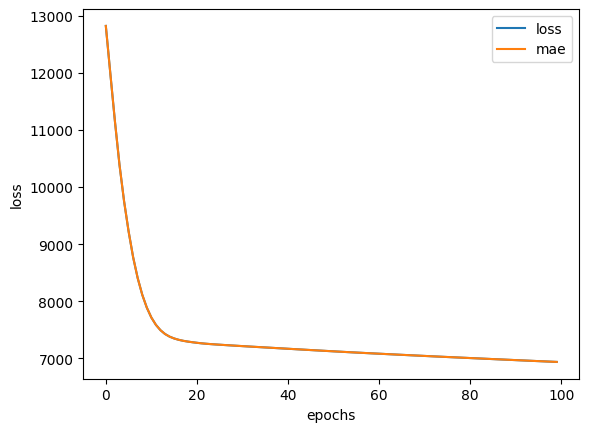

In [ ]:
# Plotting the loss
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Making a function

Now to, hopefully, expedite the process of creating multiple models and evaluating them, I will create a function to:

1. Create the models
2. Report the MAE of the evaluation using the test data
3. Plot the loss over time.

In [ ]:
# Model Creating Function

def create_neural_network(seed = 10, # sets random seed to 10 by default
                   num_layers = 0, # adds 0 additional hidden layers
                   num_units = 0, # sets number of units in additional hidden layers to 0
                   optimizer = "SGD", # sets optimizer to SGD by default
                   learning_rate = .001, # sets learning_rate if using Adam optimizer
                   epochs = 100): # epochs is set to 100 by default
  """
  A function that creates a neural network with num_layers additional hidden layers, each of which has num_units hidden units. The optimizer is either SGD or Adam for the purposes of this project. Epochs is 100 by default but can adjusted.
  """
  tf.random.set_seed(seed)

  # 1. Create dummy model
  dummy_model = tf.keras.Sequential([])

  # 2. Add hidden layers
  for i in range(num_layers):
    dummy_model.add(tf.keras.layers.Dense(num_units))
  dummy_model.add(tf.keras.layers.Dense(1))

  # 3. Compile the model
  if optimizer == "SGD":
    dummy_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
  else:
    dummy_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
                        metrics = ["mae"])

  # 4. Fit the model
  history = dummy_model.fit(expvar_train, charges_train, epochs = epochs, verbose = 0) # This function is specific to this project so it will be using the training and test data I have already created

  # 5. Evaluate the model
  test_mae = dummy_model.evaluate(expvar_test, charges_test)

  # 6. Plot the loss over time
  pd.DataFrame(history.history).plot()
  plt.xlabel("epochs")
  plt.ylabel("loss")

  # 7. Return evaluation metric
  print(test_mae)

### Improving the model

The first model is never the best, so now I will attempt to create 3 more models that will (hopefully) have improved performance.

* `Model 2` : 1 add. hidden layer with 100 units, 100 epochs
* `Model 3` : Same as `Model 2` but with 200 epochs
* `Model 4` : 2 add. hidden layers with 100 units, 100 epochs

**Optimizer:** If necessary the optimizer will be changed to Adam if SGD is unable to return an MAE value.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6532.3247 - mae: 6532.3247 
[6894.8564453125, 6894.8564453125]


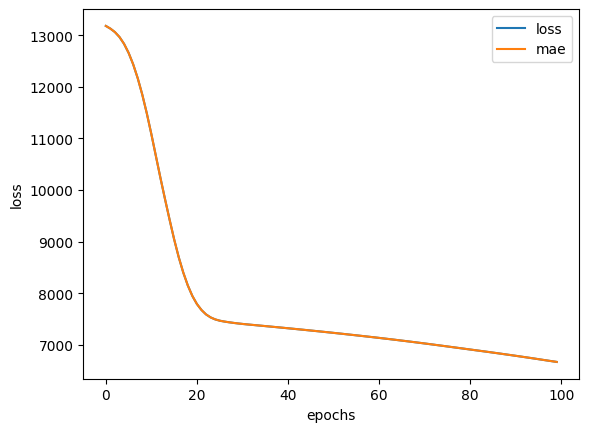

In [ ]:
# Creating Model 2
insurance_model_2 = create_neural_network(num_layers = 1, num_units = 100, optimizer = "Adam") # The model seemed to struggle to learn using the SGD optimizer so Adam was used

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5969.2246 - mae: 5969.2246 
[6339.80126953125, 6339.80126953125]


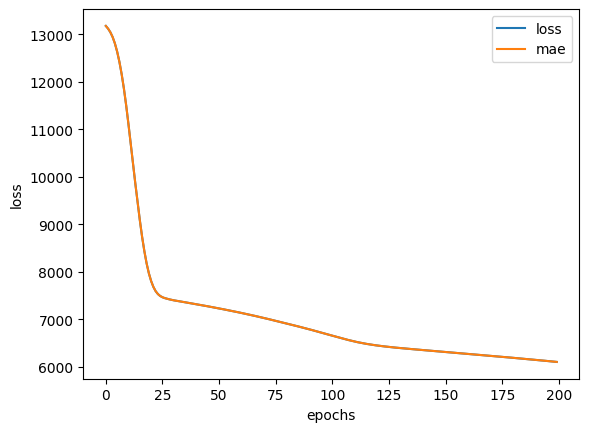

In [ ]:
# Creating Model 3
insurance_model_3 = create_neural_network(num_layers = 1, num_units = 100, optimizer = "Adam", epochs = 200) # The model seemed to struggle to learn using the SGD optimizer so Adam was used

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3702.9429 - mae: 3702.9429  
[3871.715087890625, 3871.715087890625]


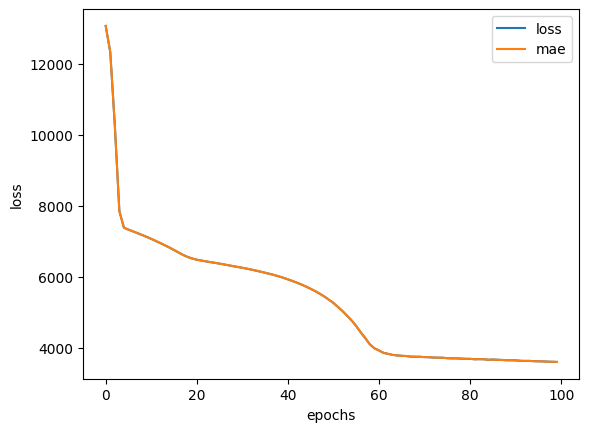

In [ ]:
# Creating Model 4
insurance_model_4 = create_neural_network(num_layers = 2, num_units = 100, optimizer = "Adam", epochs = 100) # The model seemed to struggle to learn using the SGD optimizer so Adam was used

### Best performing model so far

`Model 4` performed the best with an MAE of ~3700. The model's learning appeared to drop-off drastically at 60 epochs, but there is definite decrease until 100 epochs. Therefore, it could be said that 200 epochs would result in an even better MAE, which I will be testing.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3870.9595 - mae: 3870.9595  
[3888.460205078125, 3888.460205078125]


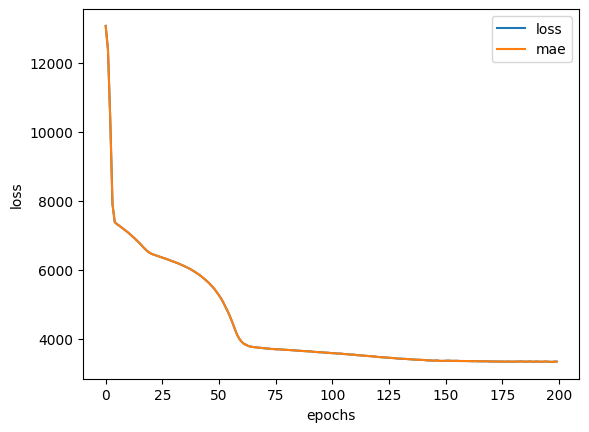

In [ ]:
# Enhancing Model 4
insurance_model_4_enhanced = create_neural_network(num_layers = 2, num_units = 100, optimizer = "Adam", epochs = 200) # Same as Model 4, but epochs = 200 instead of 100 to give model more opportunity to improve

**Too many epochs!!** The tail-end of the graph shows a slight increase in MAE, possibly a result of the model overfitting for the training data. Around 125 epochs seems to still be decreasing... time to test it.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3809.6985 - mae: 3809.6985  
[3896.514892578125, 3896.514892578125]


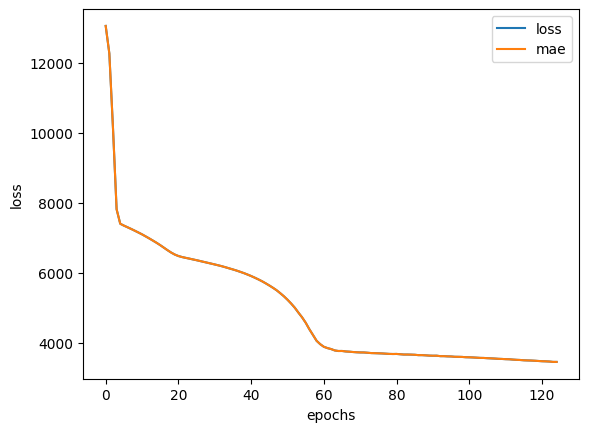

In [ ]:
insurance_model_4_enhanced_2 = create_neural_network(num_layers = 2, num_units = 100, optimizer = "Adam", epochs = 125) # Reducing number of epochs to 125 to try and reduce overfitting

### Neural Network Conclusions

Despite trying to optimize the number of epochs manually, insurance_model_4 seems to perform the best compared to either of its 'enhanced' counterparts.  The final, best model (Model 4) has an MAE of ~3700 with 2 additional hidden layers each with 100 hidden units. It uses the Adam optimizer with the default learning rate and runs for 100 epochs.

Additional Notes:
1. Early Stopping Callback (or other methods) can be used to better optimize the number of epochs the model runs compared to guessing based on the loss graph. *Although this will not be explored in this project*.
2. The training and test data is not Normalized or Standardized which could further improve the MAE value and should be tested.
3. Only 6 neural networks were created. There is a decent likelihood that changing the number of additional hidden layers and the number of hidden units could reduce the MAE further.
4. The function used to create the neural networks, while handy, does not allow for additional hidden layers to have a different number of hidden units. This means the optimization of the neural network is slightly one-dimensional when it comes to changing the number of hidden layers and units.